In [175]:
import pandas as pd
import numpy as np

from util.base import Data
from util.id3 import Tree
from util.visualizerID3 import TreeVisualizer

## <span style="color: blue"> **Einlesen, Analysieren und Vorverarbeiten der Daten** </span>

### DataFrame aus der csv-Datei einlesen

In [176]:
csvFile="data/Konsumkredit.csv"
df = pd.read_csv(csvFile)
df

,Geschlecht,Familienstand,Kinder,Beruf,Wohneigentum,Einkommen,Ersparnisse,kreditwuerdig
0,W,V,1,ungelernt,N,2514,N,N
1,M,V,0,ungelernt,N,2285,J,N
2,M,V,1,angelernt,N,3468,N,N
3,W,V,0,unbekannt,N,2172,N,N
4,M,W,1,Facharbeiter,J,2101,J,N
...,...,...,...,...,...,...,...,...
2419,M,V,1,unbekannt,N,3241,J,J
2420,W,V,1,Facharbeiter,N,3362,J,J
2421,M,V,1,Facharbeiter,N,3618,J,J
2422,W,V,2,Facharbeiter,N,3169,J,J


### Zielvariable festlegen

In [177]:
classLabel = 'kreditwuerdig'

### Diagramme für die Werte der Predictorvariable <span style="color: blue"> Geschlecht</span>

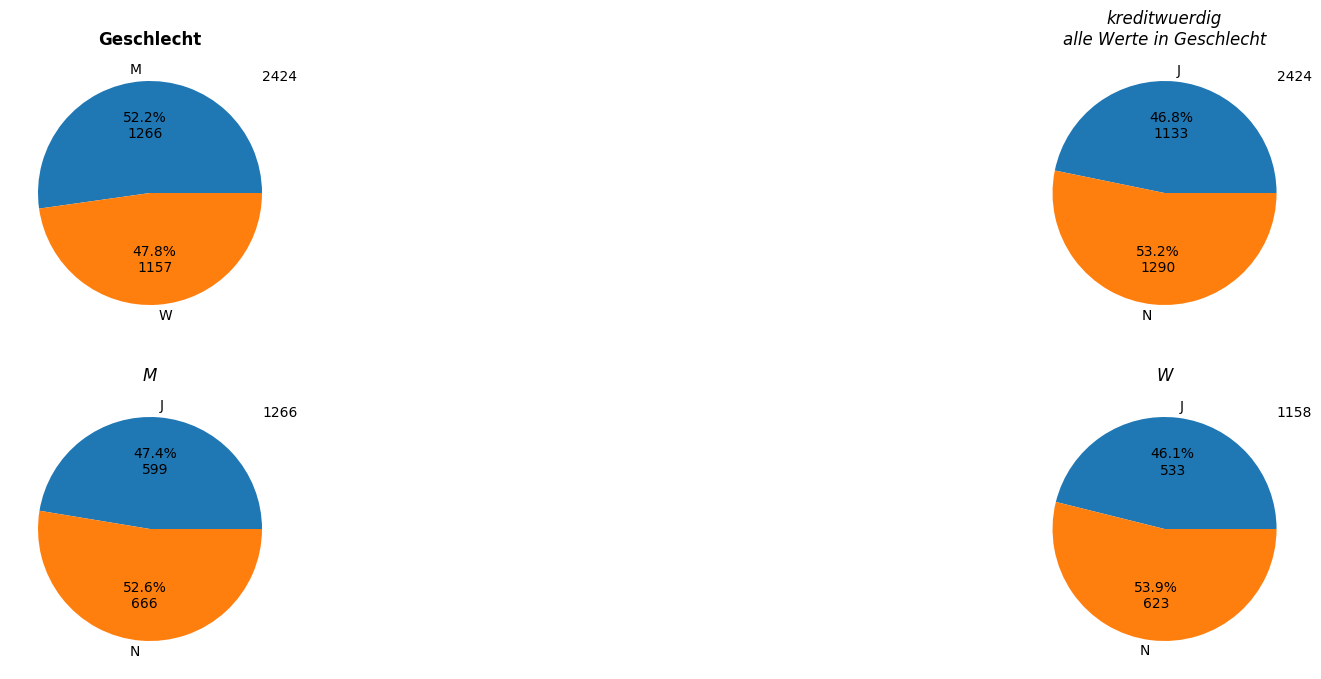

In [178]:
Data.showPieCharts(df=df, attribute='Geschlecht', classLabel=classLabel)

### Diagramme für die Werte der Predictorvariable <span style="color:blue"> Familienstand </span>

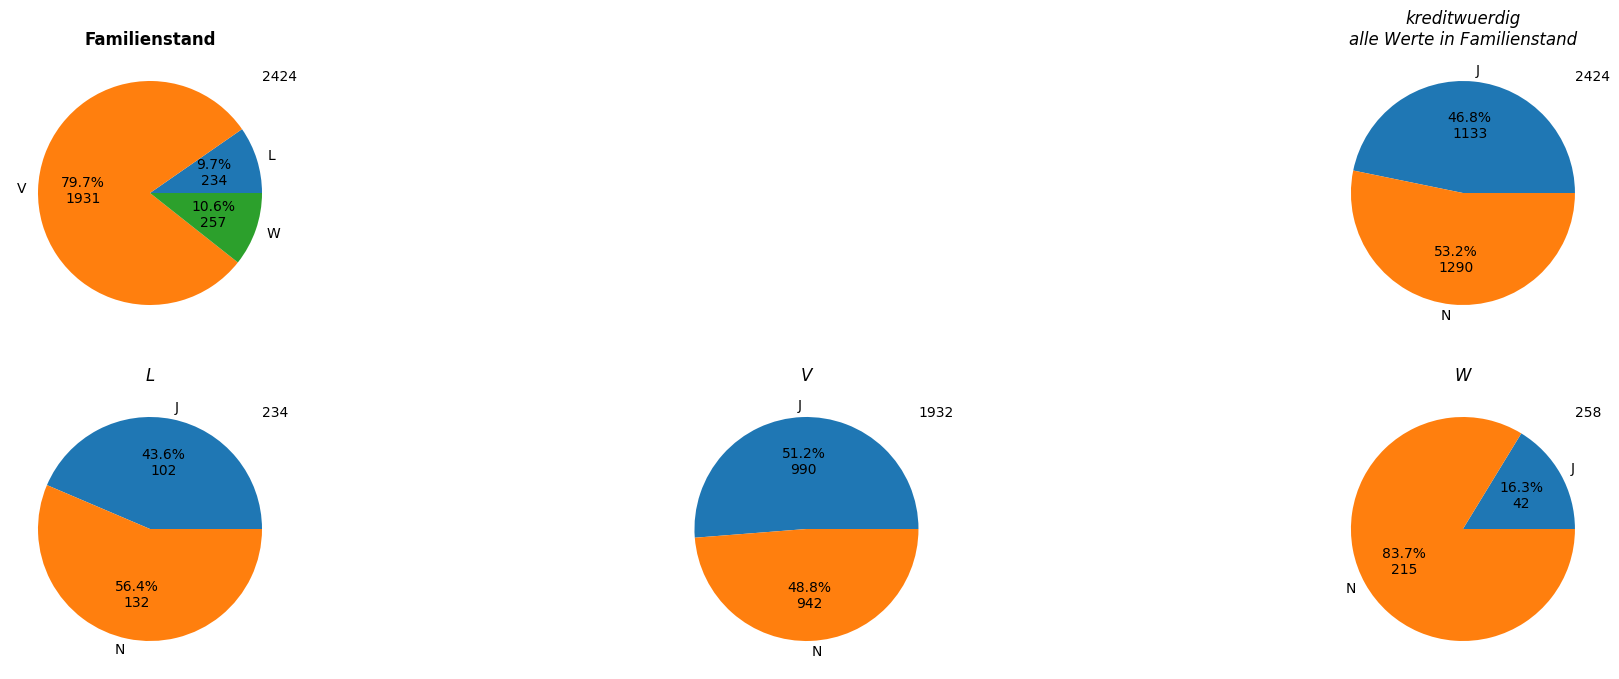

In [179]:
Data.showPieCharts(df=df, attribute='Familienstand', classLabel=classLabel)

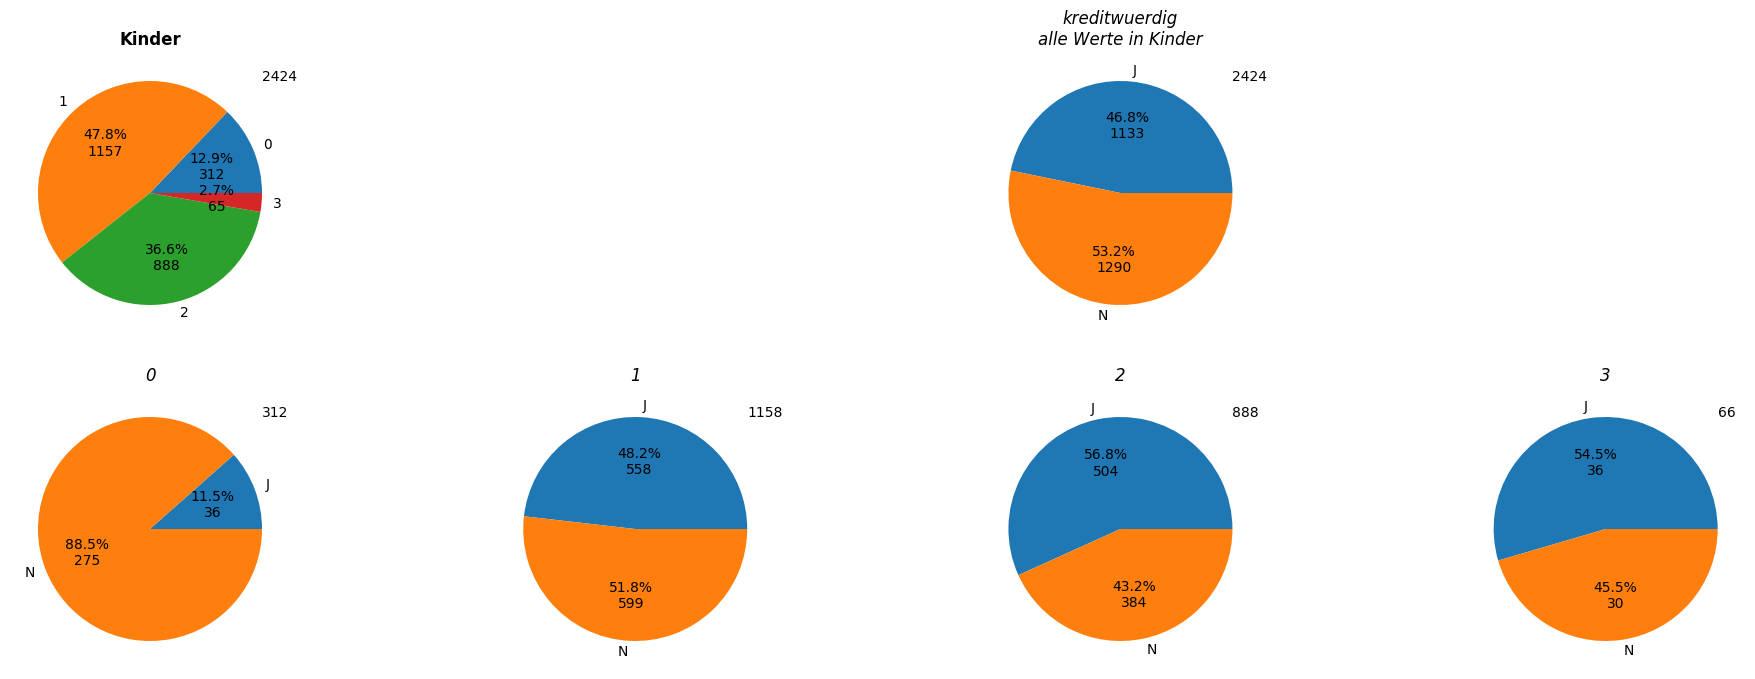

In [180]:
Data.showPieCharts(df=df, attribute='Kinder', classLabel=classLabel)

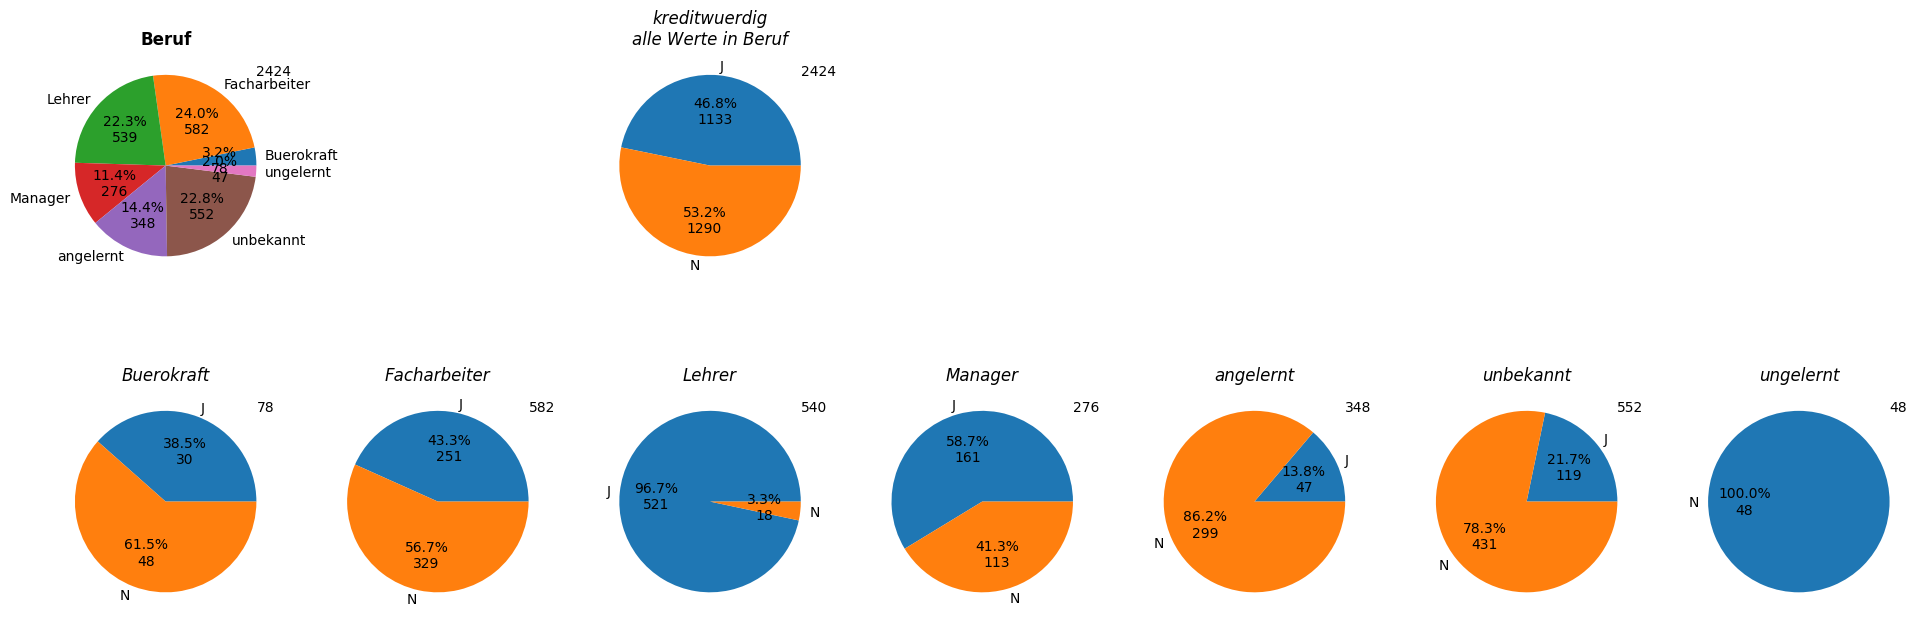

In [181]:
Data.showPieCharts(df=df, attribute='Beruf', classLabel=classLabel)

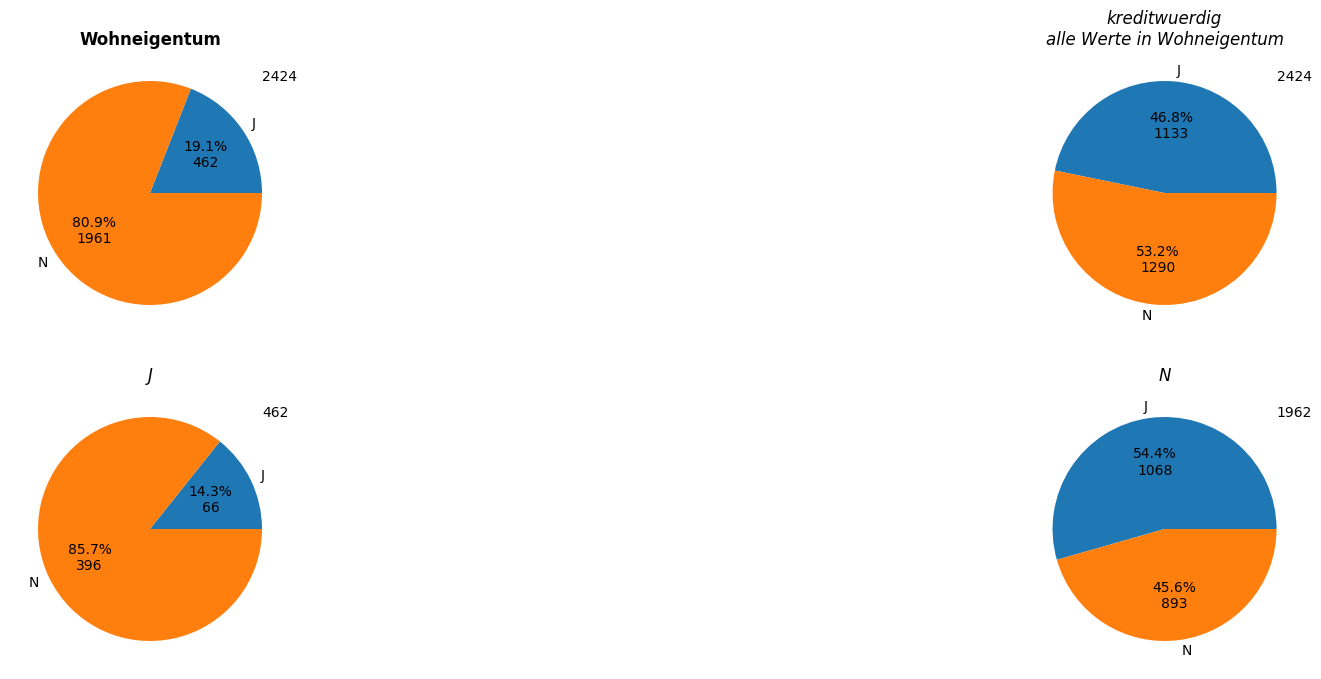

In [182]:
Data.showPieCharts(df=df, attribute='Wohneigentum', classLabel=classLabel)

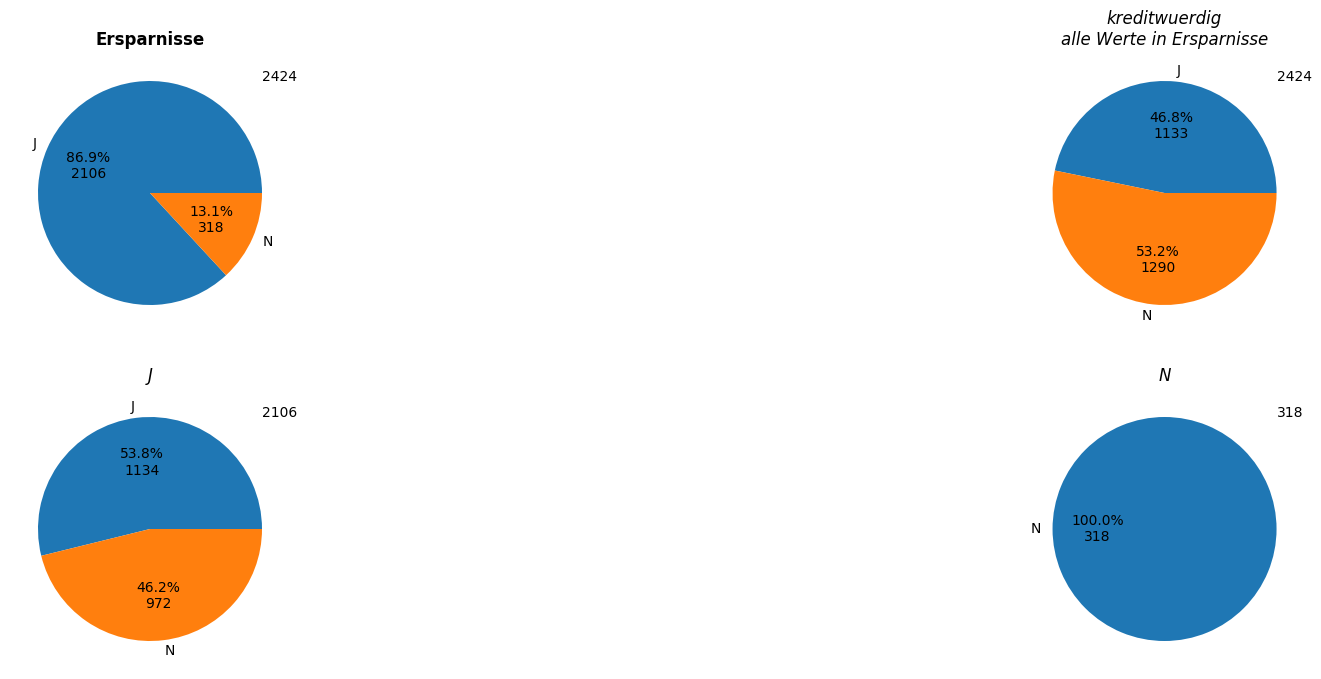

In [183]:
Data.showPieCharts(df=df, attribute='Ersparnisse', classLabel=classLabel)

### Überführen numerischer Werte in kategoriale Werte: <span style="color:blue"> Alter => Altersklasse </span> 

In [184]:
# numerische Werte in kategoriale überführen   
numAttribute = 'Einkommen'
conditionlist = [
    (df[numAttribute] <  4000) ,
    (df[numAttribute] >= 4001) & (df[numAttribute] < 6000),
    (df[numAttribute] >= 6001) & (df[numAttribute] < 8000),
    (df[numAttribute] >= 8001)]
choicelist = ['<4000', '4001-6000', '6001-8000', '>8000']   
df['Einkommen'] = np.select(conditionlist, choicelist, default='unbestimmt')
df

,Geschlecht,Familienstand,Kinder,Beruf,Wohneigentum,Einkommen,Ersparnisse,kreditwuerdig
0,W,V,1,ungelernt,N,<4000,N,N
1,M,V,0,ungelernt,N,<4000,J,N
2,M,V,1,angelernt,N,<4000,N,N
3,W,V,0,unbekannt,N,<4000,N,N
4,M,W,1,Facharbeiter,J,<4000,J,N
...,...,...,...,...,...,...,...,...
2419,M,V,1,unbekannt,N,<4000,J,J
2420,W,V,1,Facharbeiter,N,<4000,J,J
2421,M,V,1,Facharbeiter,N,<4000,J,J
2422,W,V,2,Facharbeiter,N,<4000,J,J


### Diagramme für die Werte der Predictorvariable <span style="color:blue"> Altersklasse </span>

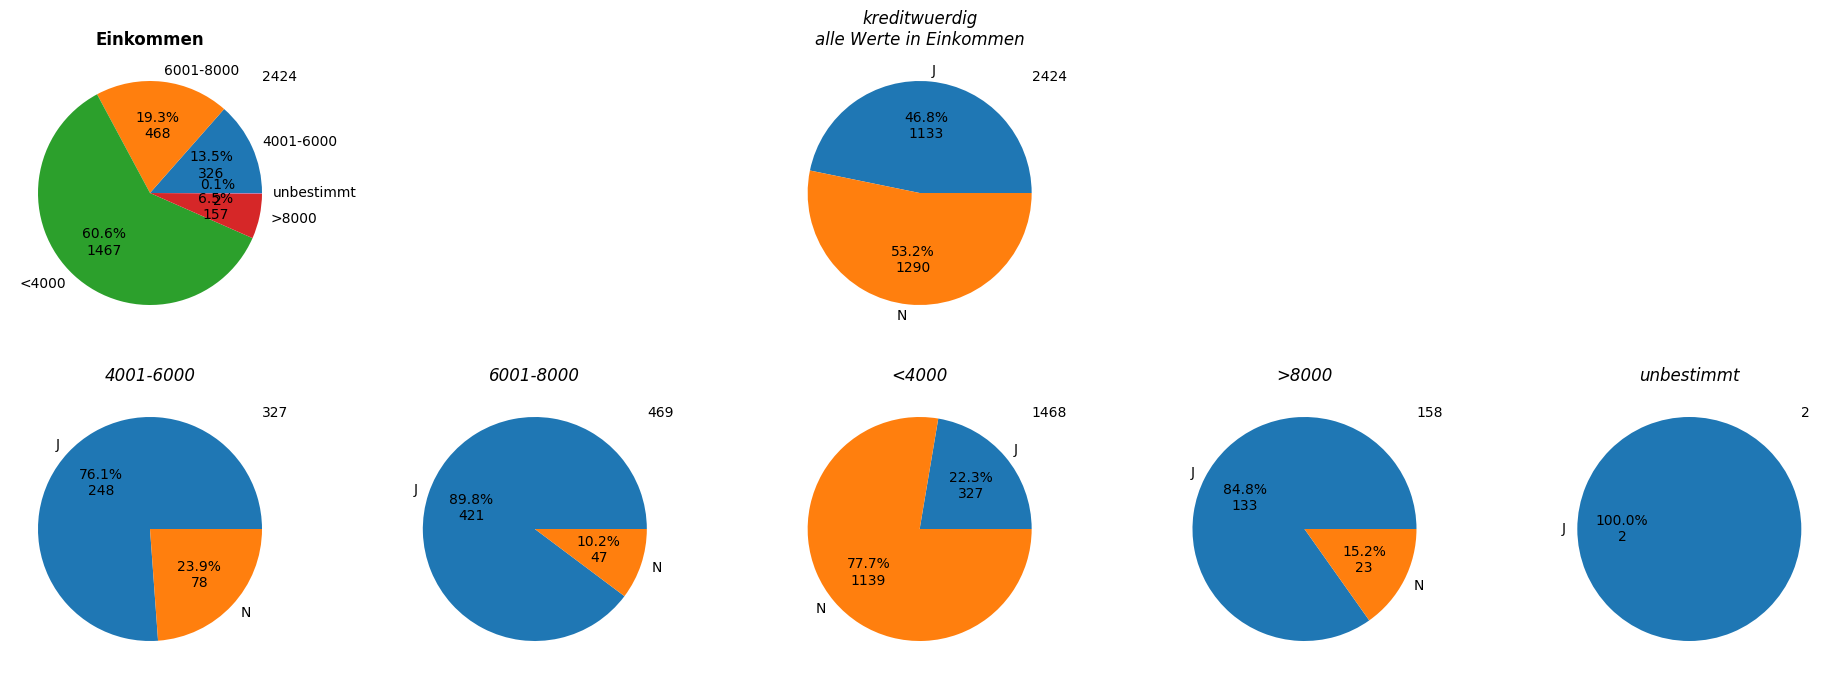

In [185]:
Data.showPieCharts(df=df, attribute='Einkommen', classLabel=classLabel)

# <span style="color: blue"> **Initialisieren der Daten für die Modellerstellung** </span>

### Liste der Predictorvariablen festlegen


In [186]:
listOfAttributes = ['Geschlecht', 'Familienstand', 'Kinder', 'Beruf', 'Wohneigentum', 'Ersparnisse', 'Einkommen']

### Berechnung initialisieren und dabei Split in Trainungs-, Validierungs- und Testdatenmenge durchführen

In [187]:
data = Data(df = df)
data.initialize(listOfAttributes = listOfAttributes, classLabel = classLabel, trainProportion=0.7, valProportion=0.0)

### Trainingsdaten

In [188]:
# Testdaten
mask = df['_split'] == 'train'
df[mask]

,Geschlecht,Familienstand,Kinder,Beruf,Wohneigentum,Einkommen,Ersparnisse,kreditwuerdig,_split
1,M,V,0,ungelernt,N,<4000,J,N,train
4,M,W,1,Facharbeiter,J,<4000,J,N,train
7,M,V,2,Facharbeiter,J,<4000,J,N,train
8,W,W,0,Facharbeiter,N,<4000,N,N,train
9,W,V,2,angelernt,N,<4000,N,N,train
...,...,...,...,...,...,...,...,...,...
2417,M,V,1,Lehrer,N,<4000,J,J,train
2418,M,W,1,angelernt,N,<4000,J,J,train
2419,M,V,1,unbekannt,N,<4000,J,J,train
2420,W,V,1,Facharbeiter,N,<4000,J,J,train


### Testdaten

In [189]:
mask = df['_split'] == 'test'
df[mask]

,Geschlecht,Familienstand,Kinder,Beruf,Wohneigentum,Einkommen,Ersparnisse,kreditwuerdig,_split
0,W,V,1,ungelernt,N,<4000,N,N,test
2,M,V,1,angelernt,N,<4000,N,N,test
3,W,V,0,unbekannt,N,<4000,N,N,test
5,M,V,1,angelernt,J,<4000,J,N,test
6,M,V,0,unbekannt,N,<4000,J,N,test
...,...,...,...,...,...,...,...,...,...
2405,M,V,2,Lehrer,J,>8000,J,J,test
2406,W,V,1,Lehrer,N,>8000,J,J,test
2413,M,V,2,Manager,N,4001-6000,J,J,test
2421,M,V,1,Facharbeiter,N,<4000,J,J,test


### Validierungsdaten

In [190]:
mask = df['_split'] == 'val'
df[mask]

,Geschlecht,Familienstand,Kinder,Beruf,Wohneigentum,Einkommen,Ersparnisse,kreditwuerdig,_split


### Zusammenfassung des Split-Ergebnis

In [191]:
dfSplit = data.splitCheck()
dfSplit

,Anzahl Datensätze,Anteil an Gesamt,Anzahl 'N',Anteil 'N',Anzahl 'J',Anteil 'J'
Gesamt,2424,1.000000,1290,0.532178,1134,0.467822
Trainingsdaten,1695,0.699257,902,0.532153,793,0.467847
Validierungsdaten,0,0.000000,0,0.000000,0,0.000000
Testdaten,729,0.300743,388,0.532236,341,0.467764


# <span style="color: blue"> **Generieren des Entscheidungsbaums auf Basis der Trainingsdaten** </span>

In [192]:
id3Tree = Tree()
id3Tree.generateTree(data=data, minElements=5, maxLevel=99)

# <span style="color: blue"> **Anzeige des Entscheidungsbaums** </span>

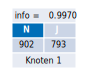

In [193]:
vs = TreeVisualizer()
dot = vs.DrawTree(tree = id3Tree)
dot

# <span style="color: blue"> **Anwenden der Entscheidungsbaums auf die Testdaten** </span>

In [194]:
mask = id3Tree.Data.Df['_split'] == 'test'
dataFrameOfResult = id3Tree.applyTree(df[mask]) 
dataFrameOfResult

,Modell,Real
0,N,N
2,N,N
3,N,N
5,N,N
6,N,N
...,...,...
2405,N,J
2406,N,J
2413,N,J
2421,N,J


### Ausgabe des Tests als Kreuztabelle

In [195]:
crossTable = pd.crosstab(dataFrameOfResult['Modell'],
                             dataFrameOfResult['Real'],
                             margins= True, margins_name='Summe')    
crossTable

Real,J,N,Summe
Modell,,,
N,341,388,729
Summe,341,388,729


# <span style="color: blue"> **Entscheidungsbaum mit minElements = 5** </span>

### Generieren des Entscheidungsbaums

In [196]:
id3Tree = Tree()
id3Tree.generateTree(data=data, minElements=1, maxLevel=3)

### Anzeige des Entscheidungsbaums

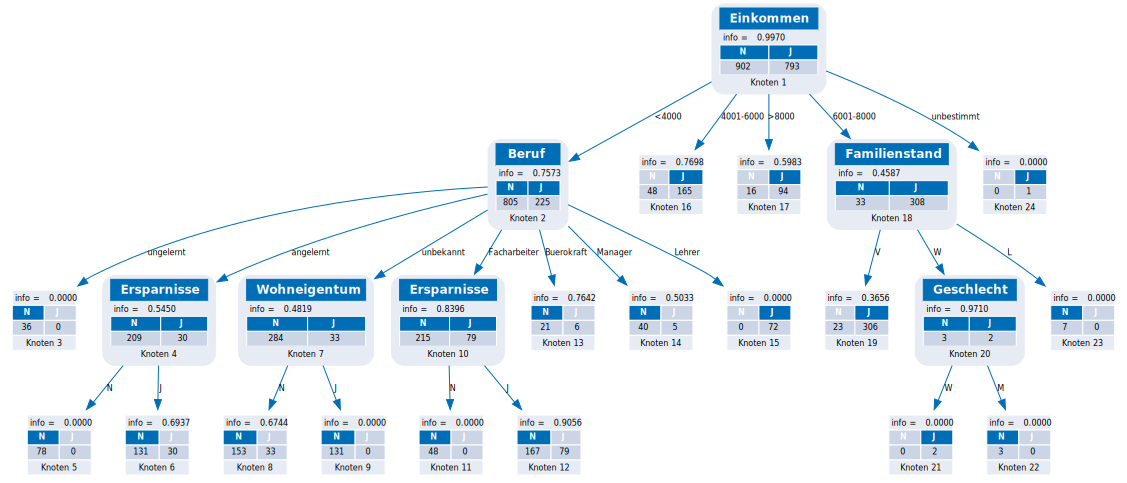

In [197]:
vs = TreeVisualizer()
dot = vs.DrawTree(tree = id3Tree)
dot

### Anwenden der Entscheidungsbaums auf die Testdaten

In [198]:
mask = id3Tree.Data.Df['_split'] == 'test'
dataFrameOfResult = id3Tree.applyTree(df[mask]) 
dataFrameOfResult

,Modell,Real
0,N,N
2,N,N
3,N,N
5,N,N
6,N,N
...,...,...
2405,J,J
2406,J,J
2413,J,J
2421,N,J


### Ausgabe des Tests als Kreuztabelle

In [199]:
crossTable = pd.crosstab(dataFrameOfResult['Modell'],
                             dataFrameOfResult['Real'],
                             margins= True, margins_name='Summe')    
crossTable

Real,J,N,Summe
Modell,,,
J,265,45,310
N,76,343,419
Summe,341,388,729
